# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [2]:
dataset_path = '/kaggle/input/global-health-statistics/Global Health Statistics.csv'

# Read the dataset into a DataFrame

In [3]:
df = pd.read_csv(dataset_path)

# Display the first few rows to understand the structure of the dataset
df.head()

# Basic dataset information
df.info()

# Checking for missing values
df.isnull().sum()

# Summary statistics for numeric columns
df.describe()

# Checking for duplicate rows
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

0

In [4]:
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


# Data Preprocessing

In [5]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Disease Name'] = le.fit_transform(df['Disease Name'])
df['Disease Category'] = le.fit_transform(df['Disease Category'])
df['Age Group'] = le.fit_transform(df['Age Group'])
df['Gender'] = le.fit_transform(df['Gender'])

# Visualizing the distribution of diseases globally

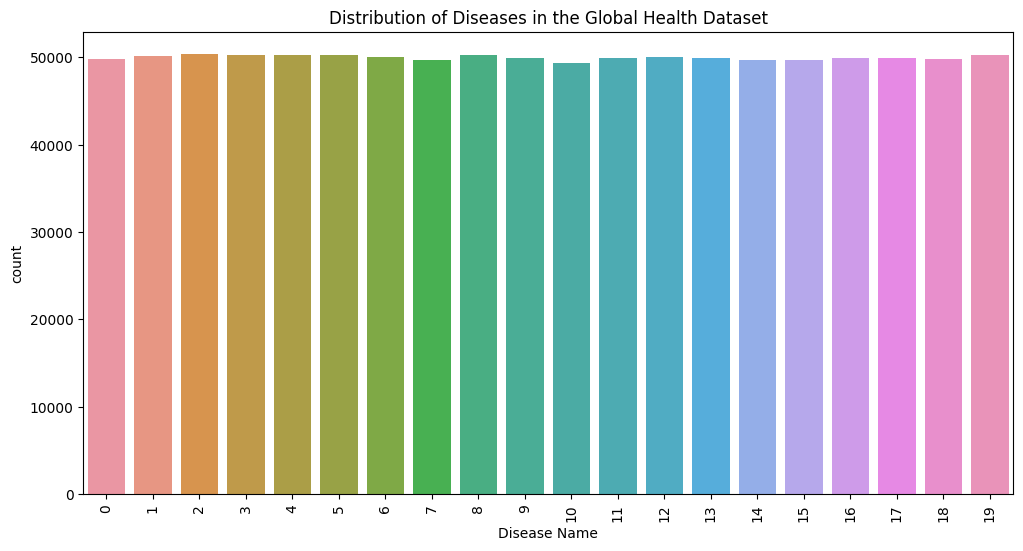

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disease Name')
plt.title('Distribution of Diseases in the Global Health Dataset')
plt.xticks(rotation=90)
plt.show()

# Analyzing Prevalence, Mortality, and Recovery Rates by Disease Category

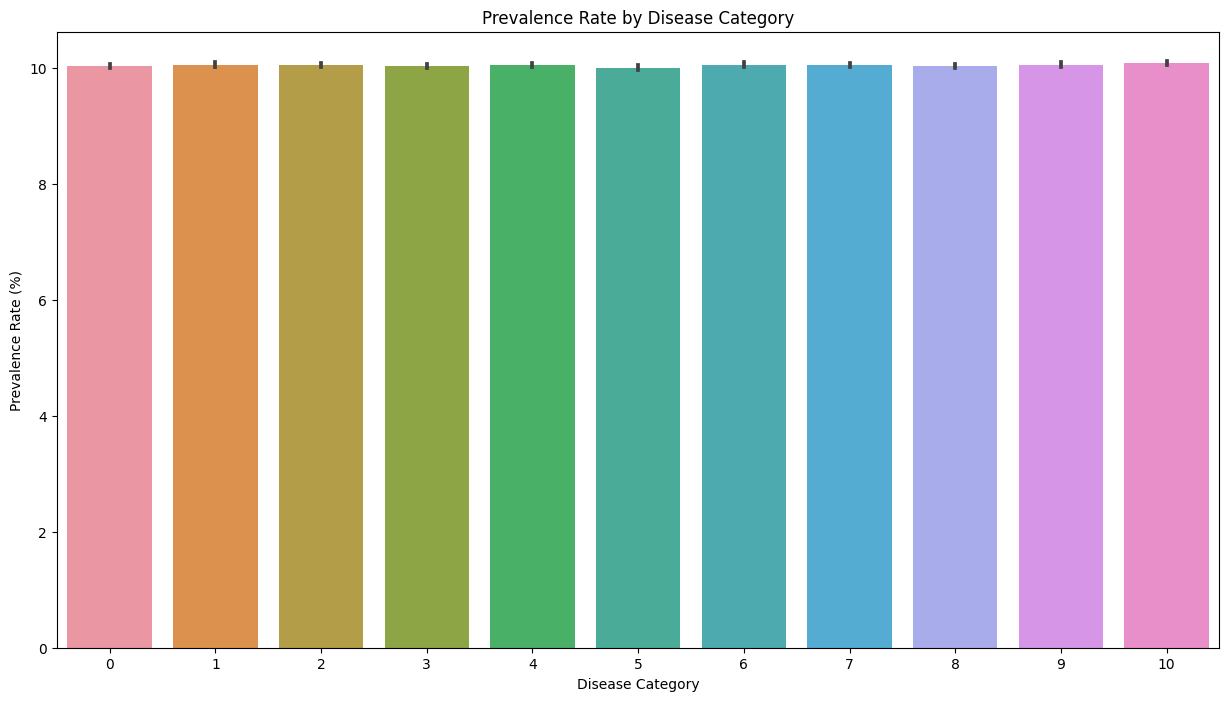

In [7]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Prevalence Rate (%)', data=df)
plt.title('Prevalence Rate by Disease Category')
plt.show()

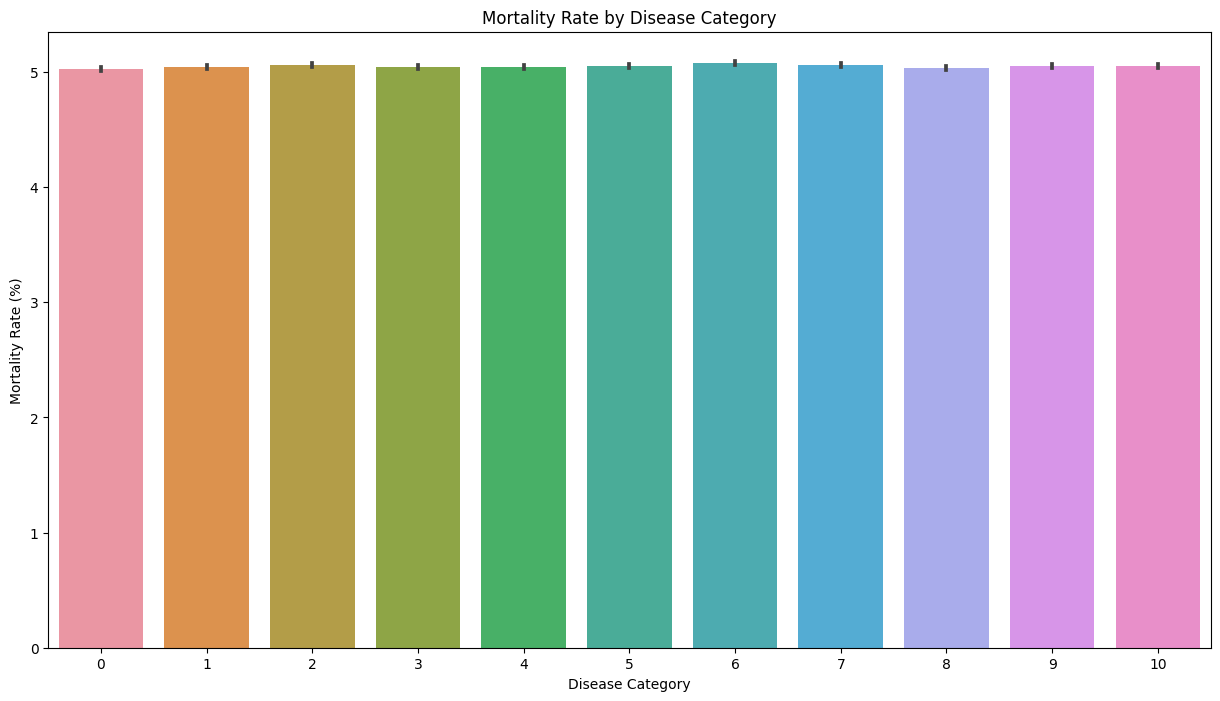

In [8]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Mortality Rate (%)', data=df)
plt.title('Mortality Rate by Disease Category')
plt.show()

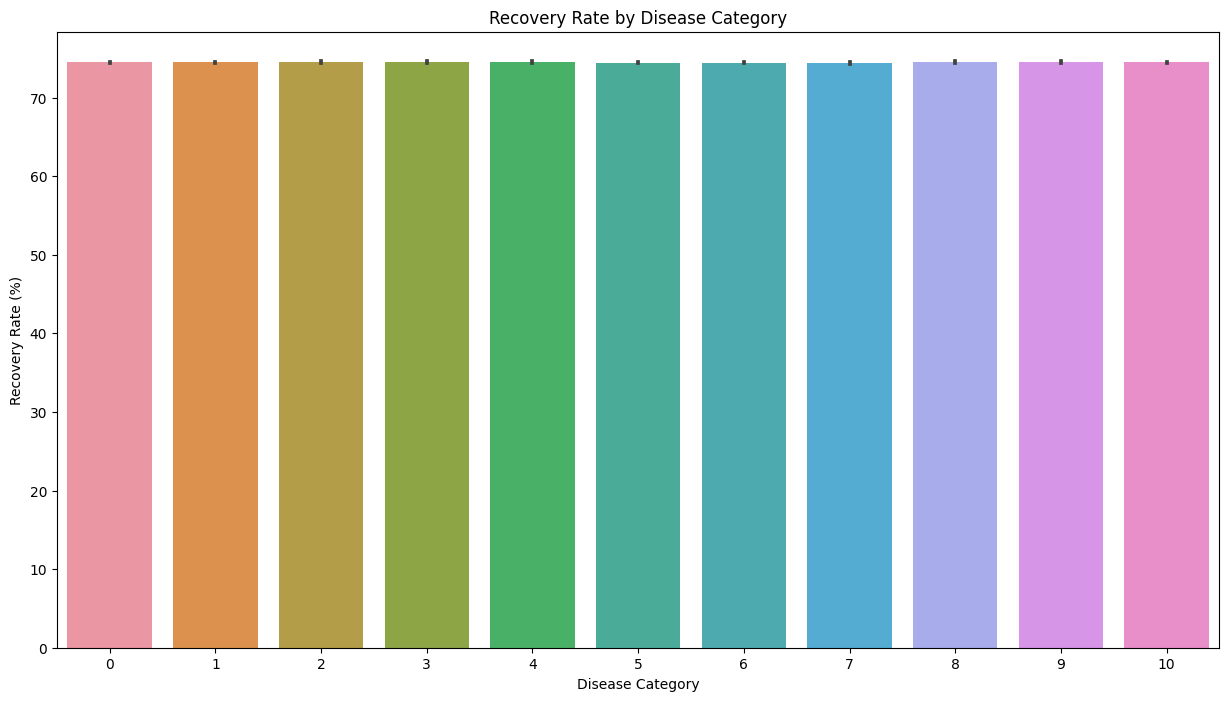

In [9]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Recovery Rate (%)', data=df)
plt.title('Recovery Rate by Disease Category')
plt.show()

In [10]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

                               Country      Year  Disease Name  \
Country                       1.000000  0.001737     -0.001666   
Year                          0.001737  1.000000     -0.003003   
Disease Name                 -0.001666 -0.003003      1.000000   
Disease Category             -0.001545 -0.001984     -0.001743   
Prevalence Rate (%)           0.001723 -0.000818     -0.000398   
Incidence Rate (%)            0.000909 -0.000944      0.000067   
Mortality Rate (%)           -0.000680  0.000448      0.000358   
Age Group                     0.000313  0.000083      0.000455   
Gender                       -0.000040  0.001241      0.000544   
Population Affected          -0.000107  0.000686      0.000280   
Healthcare Access (%)         0.000759 -0.001291      0.000808   
Doctors per 1000             -0.001113 -0.000027      0.001264   
Hospital Beds per 1000        0.000318 -0.000645      0.000619   
Average Treatment Cost (USD)  0.001936  0.001275     -0.000046   
Recovery R

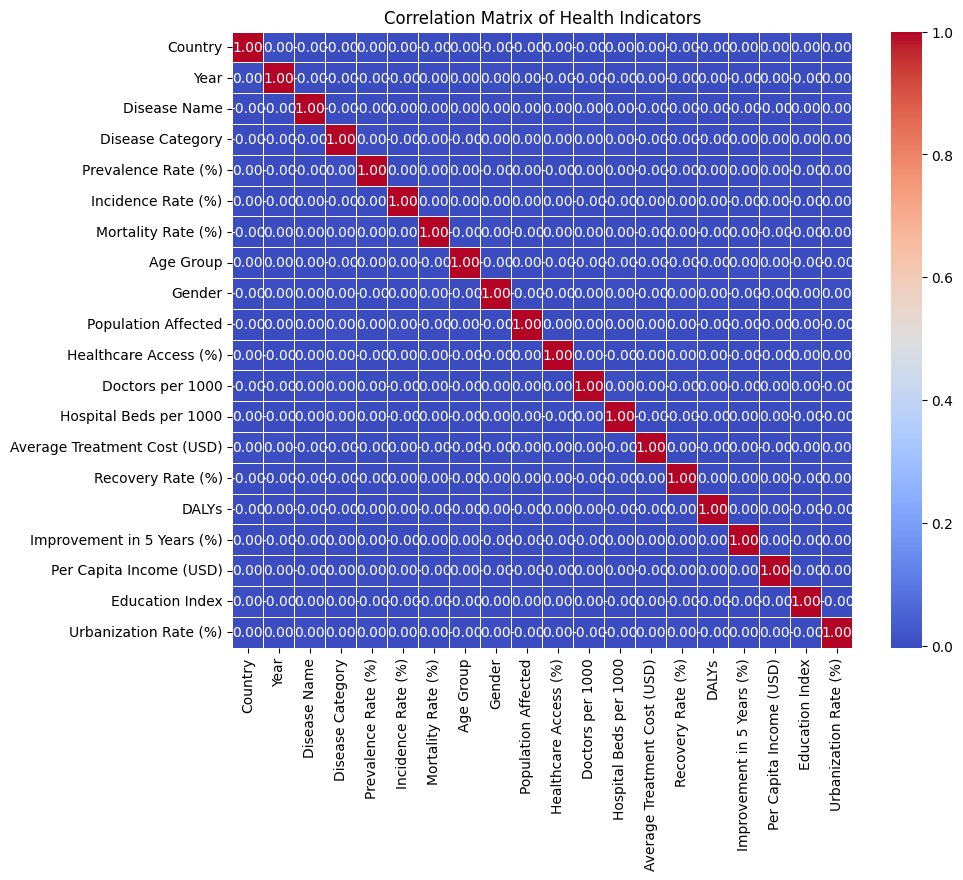

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators')
plt.show()

# Exploring Healthcare Access vs Population Affected

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


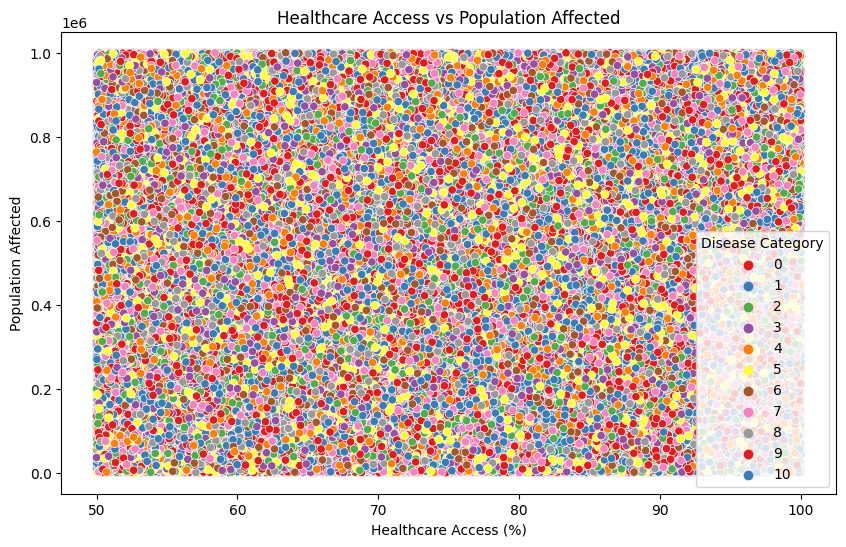

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Healthcare Access (%)', y='Population Affected', data=df, hue='Disease Category', palette='Set1')
plt.title('Healthcare Access vs Population Affected')
plt.show()

# Disease prevalence by continent (based on hypothetical region grouping)

In [13]:
df['Region'] = np.where(df['Country'] < 10, 'Asia', 
                        np.where(df['Country'] < 20, 'North America', 
                                 np.where(df['Country'] < 30, 'Africa', 
                                          np.where(df['Country'] < 40, 'Europe', 'Other'))))

# Grouping and plotting disease prevalence by region

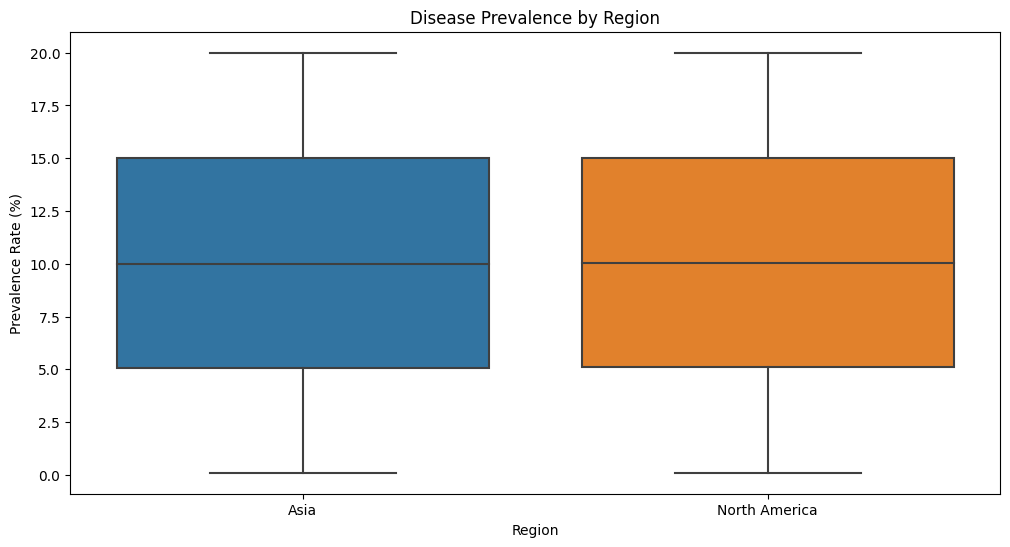

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Prevalence Rate (%)', data=df)
plt.title('Disease Prevalence by Region')
plt.show()

# Top 5 countries with highest healthcare access

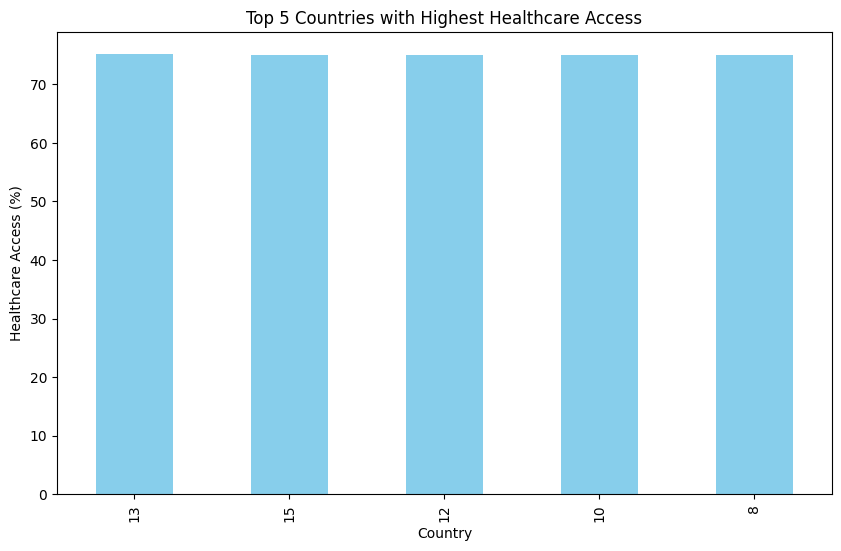

In [15]:
top_5_countries = df.groupby('Country')['Healthcare Access (%)'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Highest Healthcare Access')
plt.xlabel('Country')
plt.ylabel('Healthcare Access (%)')
plt.show()

# Average treatment cost by disease category

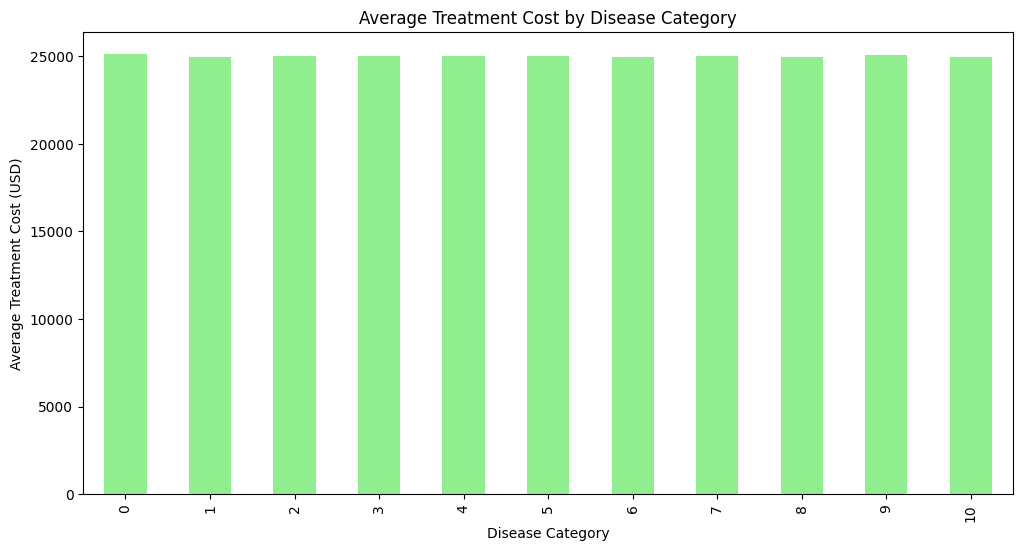

In [16]:
avg_treatment_cost = df.groupby('Disease Category')['Average Treatment Cost (USD)'].mean()
plt.figure(figsize=(12, 6))
avg_treatment_cost.plot(kind='bar', color='lightgreen')
plt.title('Average Treatment Cost by Disease Category')
plt.xlabel('Disease Category')
plt.ylabel('Average Treatment Cost (USD)')
plt.show()

# Identifying the relationship between income and healthcare access

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


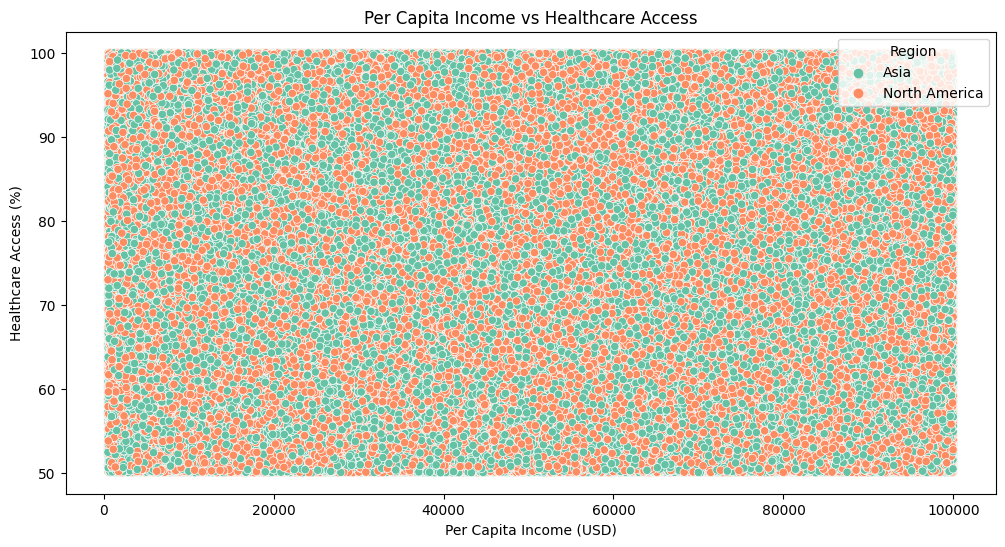

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Per Capita Income (USD)', y='Healthcare Access (%)', data=df, hue='Region', palette='Set2')
plt.title('Per Capita Income vs Healthcare Access')
plt.show()

Simplify one disease one year

In [19]:
df = pd.read_csv(dataset_path)

In [20]:
df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Saudi Arabia,2021,Parkinson's Disease,Infectious,4.56,4.83,9.65,0-18,Female,119332,...,4.23,Vaccination,4528,Yes,92.11,1024,3.88,29335,0.75,27.94
999996,Saudi Arabia,2013,Malaria,Respiratory,0.26,1.76,0.56,0-18,Female,354927,...,6.34,Surgery,20686,No,84.47,202,7.95,30752,0.47,77.66
999997,USA,2016,Zika,Respiratory,13.44,14.13,1.91,19-35,Other,807915,...,8.11,Therapy,18807,No,86.81,3338,7.31,62897,0.72,46.90
999998,Nigeria,2020,Asthma,Chronic,1.96,14.56,4.98,61+,Female,385896,...,6.91,Medication,21033,Yes,62.15,4806,3.82,98189,0.51,34.73


In [28]:
td=df.loc[df['Disease Name']=='Malaria']

In [29]:
td

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
6,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,289931,...,3.31,Surgery,15579,No,92.80,4535,0.89,60027,0.70,20.48
22,South Africa,2014,Malaria,Bacterial,5.94,4.29,2.36,61+,Female,857183,...,6.88,Therapy,14578,Yes,72.97,433,1.40,52974,0.53,43.97
32,Canada,2001,Malaria,Autoimmune,13.29,9.76,7.77,0-18,Male,205610,...,8.46,Medication,1190,No,67.79,1989,4.73,50405,0.89,38.11
37,Turkey,2006,Malaria,Cardiovascular,10.53,2.50,5.09,0-18,Male,923451,...,2.95,Vaccination,29311,Yes,93.53,110,6.45,51865,0.74,58.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999873,USA,2018,Malaria,Neurological,13.44,1.67,6.41,61+,Male,276396,...,5.15,Vaccination,18067,Yes,95.30,3059,9.96,50272,0.69,70.15
999943,Indonesia,2017,Malaria,Autoimmune,2.95,8.16,1.40,61+,Female,140855,...,7.03,Surgery,47405,No,50.38,80,1.14,84510,0.56,58.29
999976,Italy,2011,Malaria,Genetic,3.73,13.61,3.04,19-35,Other,161990,...,3.89,Therapy,47886,Yes,80.65,1387,9.76,70848,0.82,50.96
999983,South Africa,2012,Malaria,Infectious,16.50,12.23,4.49,61+,Other,888247,...,3.67,Surgery,45284,No,65.51,1372,8.01,36211,0.76,64.66


In [32]:
td[td['Country']=='USA'].sort_values(by=['Year','Age Group'])

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
99102,USA,2000,Malaria,Bacterial,1.81,12.27,9.82,0-18,Male,848902,...,9.47,Therapy,33389,Yes,70.30,4031,2.05,90090,0.49,88.93
174465,USA,2000,Malaria,Neurological,1.61,10.97,7.37,0-18,Male,481182,...,2.64,Surgery,25599,No,94.17,616,9.70,63023,0.75,42.30
194732,USA,2000,Malaria,Bacterial,7.61,11.38,6.47,0-18,Female,572892,...,2.58,Medication,41971,Yes,96.98,1919,3.19,92825,0.60,70.60
210694,USA,2000,Malaria,Metabolic,15.74,11.84,8.60,0-18,Male,57362,...,1.09,Vaccination,30963,Yes,53.71,3820,8.30,60428,0.43,60.48
218013,USA,2000,Malaria,Autoimmune,8.65,9.47,8.96,0-18,Female,461052,...,8.00,Medication,11618,Yes,98.85,679,6.16,50768,0.84,76.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848722,USA,2024,Malaria,Neurological,7.84,9.47,3.01,61+,Male,479525,...,7.02,Medication,33861,Yes,74.60,183,7.08,47513,0.64,54.30
904503,USA,2024,Malaria,Parasitic,5.90,8.54,3.75,61+,Other,213171,...,5.83,Therapy,48060,No,50.16,3415,8.63,63991,0.71,38.04
952251,USA,2024,Malaria,Bacterial,4.24,0.68,1.28,61+,Male,671604,...,8.22,Medication,24625,Yes,62.48,1264,5.71,44521,0.90,57.58
968417,USA,2024,Malaria,Cardiovascular,13.39,2.18,1.75,61+,Male,18710,...,7.56,Surgery,29624,No,78.71,1354,0.56,74078,0.88,53.47


In [ ]:
# make function to calculate rate